In [1]:
import librosa 
import librosa.display
import matplotlib.pyplot as plt

import os
import numpy as np
import time

import pickle

In [2]:
EXAMPLE = '../data/audio/Ballroom/Albums-Cafe_Paradiso-01.wav'

y, sr = librosa.load(EXAMPLE)
hop_length = 512

oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)

tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])

ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr, hop_length=hop_length)[0]

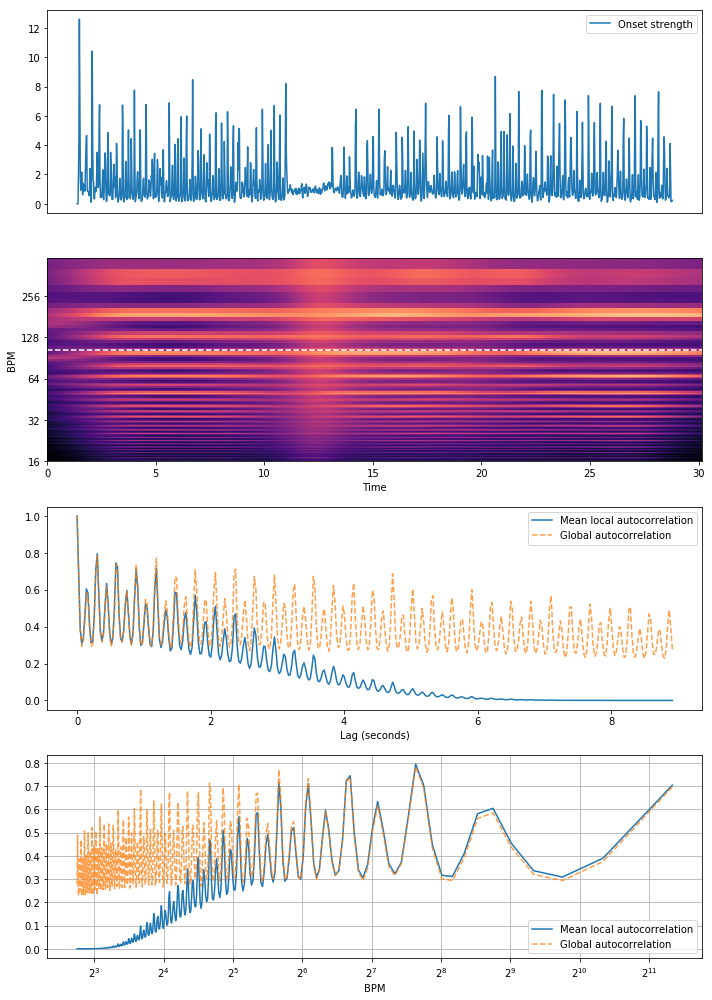

In [10]:
plt.figure(figsize=(10, 14))
plt.subplot(4, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(4, 1, 2)
# We'll truncate the display to a narrower range of tempi
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo')
# plt.axhline(tempo, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo))
plt.subplot(4, 1, 3)
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr, num=tempogram.shape[0])
plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
plt.plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
plt.xlabel('Lag (seconds)')
plt.axis('tight')
plt.legend(frameon=True)
plt.subplot(4,1,4)
# We can also plot on a BPM axis
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
plt.semilogx(freqs[1:], np.mean(tempogram[1:], axis=1), label='Mean local autocorrelation', basex=2)
plt.semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75, label='Global autocorrelation', basex=2)
plt.legend(frameon=True)
plt.xlabel('BPM')
plt.axis('tight')
plt.grid()
plt.tight_layout()

In [2]:
class DataPoint():
    def __init__(self, file):
        self.file = file
        self.audio = None
        self.feature_vector = None
        self.annotations = None
        self.predictions = None
        self.metrics = None
        self.features = None
        self.model_class = None
        self.dataset = None

In [3]:
data = pickle.load(open('../data/data.npy', 'rb'))


In [6]:
data[4].file

'4'